In [329]:
!pip install pandas numpy matplotlib seaborn scikit-learn openpyxl

In [330]:
import pandas as pd

# Load the dataset
file_path = 'Green ICT attitudes cleaned.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')
data.head()

# Display the data types and check for missing values
data.info()

# Fill missing numerical values with the mean of each column
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())

# Fill missing categorical values with the mode of each column
categorical_columns = data.select_dtypes(include=['object']).columns
data[categorical_columns] = data[categorical_columns].fillna(data[categorical_columns].mode().iloc[0])

# Verify that there are no missing values left
data.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 39 columns):
 #   Column                                                                                                                                           Non-Null Count  Dtype  
---  ------                                                                                                                                           --------------  -----  
 0   Respondent ID                                                                                                                                    73 non-null     int64  
 1   How big is your organization?                                                                                                                    73 non-null     int64  
 2   How often do you purchase ICT equipment?                                                                                                         73 non-null     int64  
 3   We acquire ICT equipme

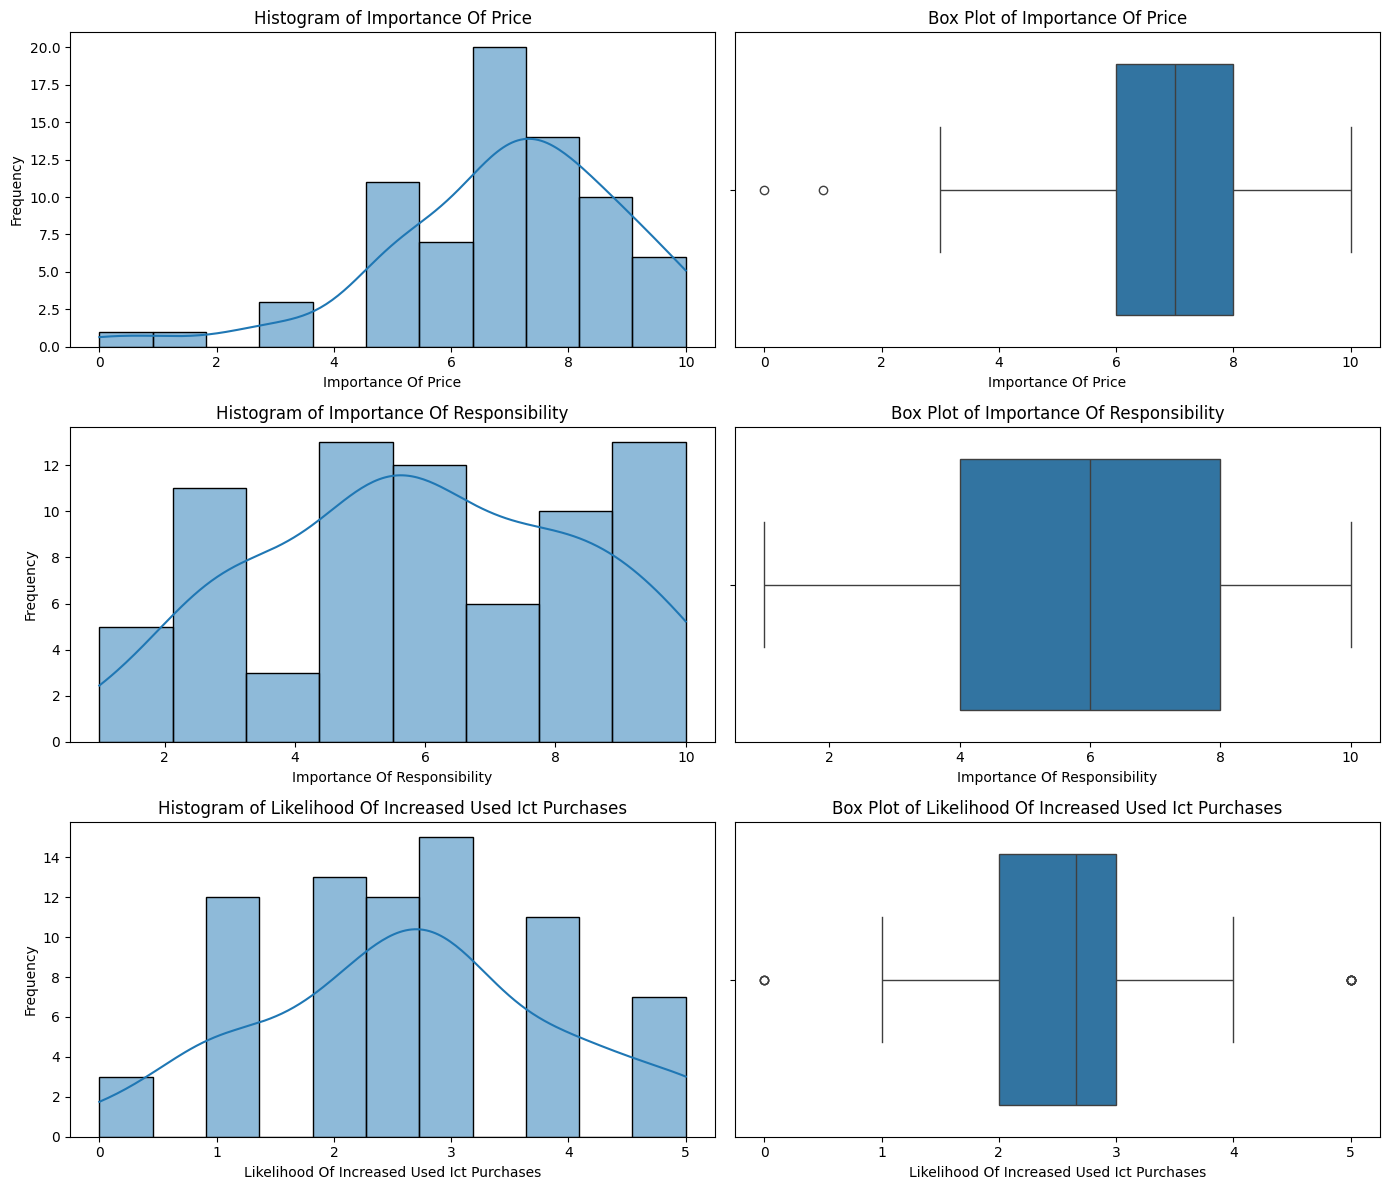

In [331]:
# Descriptive statistics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# key quantitative variables
variables = {
    'importance_of_price': 'How important is price in your ICT equipment purchases? (0 not important | 3 a little | 5 somewhat | 7 a lot | 10 crucially important)',
    'importance_of_responsibility': 'How important is responsibility in your ICT equipment purchases? (0 not important | 3 a little | 5 somewhat | 7 a lot | 10 crucially important)',
    'likelihood_of_increased_used_ict_purchases': 'How likely do you see purchases of used ICT equipment to increase in the future in your organization? (0 Not at all | 5 Definitely)'
}

# Calculate descriptive statistics
descriptive_stats = {}
for var_name, var_col in variables.items():
    descriptive_stats[var_name] = {
        'mean': data[var_col].mean(),
        'median': data[var_col].median(),
        'mode': data[var_col].mode()[0],  # Correctly access the mode
        'std_dev': data[var_col].std()
    }

# Convert to DataFrame for better visualization
descriptive_stats_df = pd.DataFrame(descriptive_stats)
descriptive_stats_df

# Set up the matplotlib figure
fig, axs = plt.subplots(3, 2, figsize=(14, 12))

# Plot histograms
for idx, (var_name, var_col) in enumerate(variables.items()):
    sns.histplot(data[var_col], kde=True, ax=axs[idx, 0])
    axs[idx, 0].set_title(f'Histogram of {var_name.replace("_", " ").title()}')
    axs[idx, 0].set_xlabel(var_name.replace("_", " ").title())
    axs[idx, 0].set_ylabel('Frequency')

# Plot box plots
for idx, (var_name, var_col) in enumerate(variables.items()):
    sns.boxplot(x=data[var_col], ax=axs[idx, 1])
    axs[idx, 1].set_title(f'Box Plot of {var_name.replace("_", " ").title()}')
    axs[idx, 1].set_xlabel(var_name.replace("_", " ").title())

plt.tight_layout()
plt.show()

# Data Analysis and Visualization

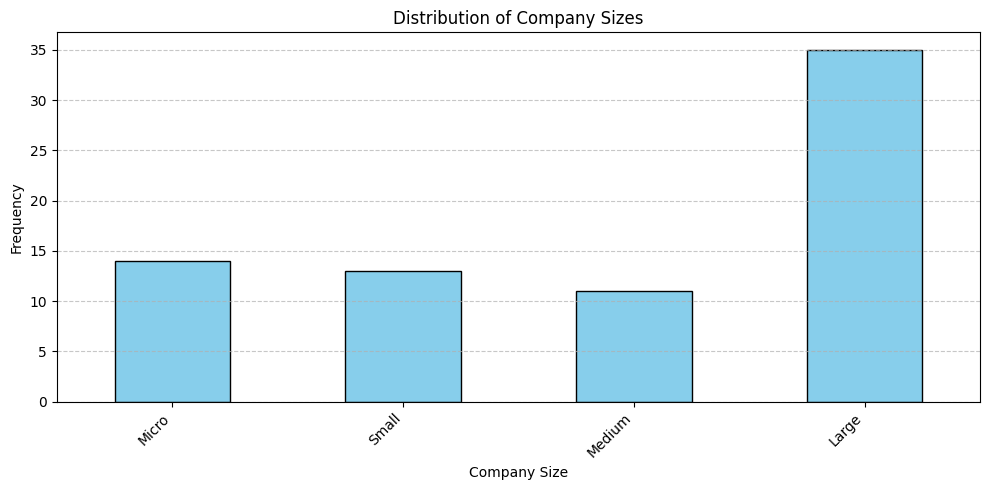

In [332]:
# Analyze the distribution of company sizes
plt.figure(figsize=(10, 5))
data['How big is your organization?'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Company Sizes')
plt.xlabel('Company Size')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Micro', 'Small', 'Medium', 'Large'], rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


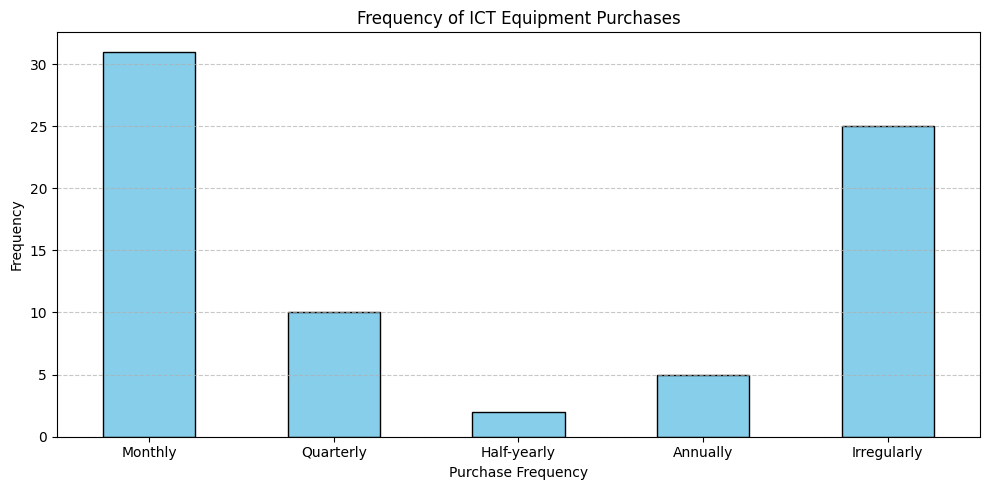

In [333]:
# Analyze how often companies purchase ICT equipment
plt.figure(figsize=(10, 5))
data['How often do you purchase ICT equipment?'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frequency of ICT Equipment Purchases')
plt.xlabel('Purchase Frequency')
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['Monthly', 'Quarterly', 'Half-yearly', 'Annually', 'Irregularly'], rotation=0, ha='center')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

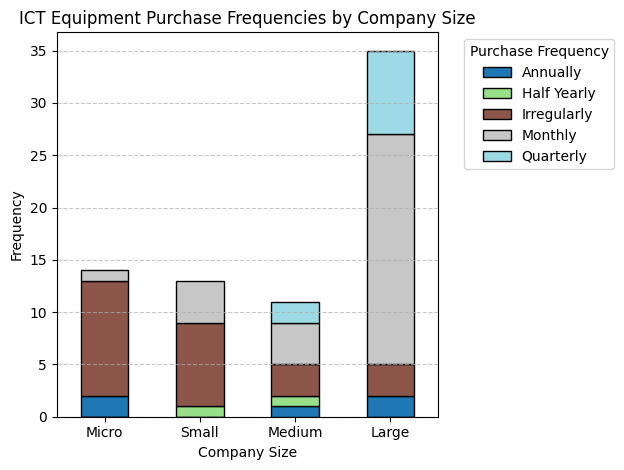

In [334]:
# Define the purchase frequency mapping
purchase_frequency_mapping = {
    1: 'Monthly',
    2: 'Quarterly',
    3: 'Half Yearly',
    4: 'Annually',
    5: 'Irregularly'
}

# Map the purchase frequency numbers to their respective categories
data['Purchase Frequency'] = data['How often do you purchase ICT equipment?'].map(purchase_frequency_mapping)

# Group by company size and purchase frequency
grouped_data = data.groupby(['How big is your organization?', 'Purchase Frequency']).size().unstack().fillna(0)

# Plotting the purchase frequencies by company size
plt.figure(figsize=(12, 6))
grouped_data.plot(kind='bar', stacked=True, colormap='tab20', edgecolor='black')
plt.title('ICT Equipment Purchase Frequencies by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Micro', 'Small', 'Medium', 'Large'], rotation=0, ha='center')
plt.legend(title='Purchase Frequency', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Correlation Analysis

In [335]:
# #library for spearman correlation
# from scipy.stats import spearmanr

# # columns for correlation analysis
# correlation_vars = [
#     'How big is your organization?',
#     'How often do you purchase ICT equipment?'
# ]

# # Create a subset of the data for correlation analysis
# correlation_data = data[correlation_vars]
# correlation_data.head

# # Compute the Spearman correlation coefficient
# spearman_corr, spearman_p_value = spearmanr(correlation_data['How big is your organization?'], correlation_data['How often do you purchase ICT equipment?'])

# print("Spearman correlation coefficient:", spearman_corr)
# print("P-value:", spearman_p_value)

# # Visualization 1: Scatter Plot with Regression Line
# plt.figure(figsize=(8, 6))
# sns.regplot(x='How big is your organization?', y='How often do you purchase ICT equipment?', data=correlation_data, scatter_kws={'alpha':0.5})
# plt.title('Scatter Plot with Regression Line')
# plt.xlabel('Organization Size')
# plt.ylabel('Purchase Frequency')
# # Set the tick locations and labels
# plt.xticks(ticks=[1, 2, 3, 4], labels=['Micro', 'Small', 'Medium', 'Large'])  
# plt.yticks(ticks=[1, 2, 3, 4, 5], labels=['Monthly', 'Quarterly', 'Half-yearly', 'Annually', 'Irregularly'])
# plt.grid(True)
# plt.show()

# # Visualization 2: Box Plot
# plt.figure(figsize=(8, 6))
# sns.boxplot(x='How big is your organization?', y='How often do you purchase ICT equipment?', data=correlation_data)
# plt.title('Box Plot of Purchase Frequency by Organization Size')
# plt.xlabel('Organization Size')
# plt.ylabel('Purchase Frequency')
# # Set the tick locations and labels
# plt.xticks(ticks=[1, 2, 3, 4], labels=['Micro', 'Small', 'Medium', 'Large'])  
# plt.yticks(ticks=[1, 2, 3, 4, 5], labels=['Monthly', 'Quarterly', 'Half-yearly', 'Annually', 'Irregularly'])
# plt.show()



 # Correlation between company size and buying used equipment
 The regression line is a straight line that is fitted through the data points. It represents the average trend in the data. In this scatter plot, the slope of the regression line is positive. This means that there is a positive correlation between the consideration of used equipment and the size of the company. In other words, companies that consider using used equipment tend to be larger than companies that do not consider using used equipment.

The Spearman correlation coefficient of 0.447,indicates a moderate positive correlation. 
This might seem contradictory because the larger organizations have more "No" responses. However, the correlation coefficient measures the overall trend and order, not just individual counts. so the larger companies tend to buy less used devices !

The p-value of 7.26e-05 suggests that this correlation is statistically significant at a significance level of  0.0001 (or 0.01%), meaning that it is unlikely to have occurred by random chance. Therefore, we can conclude that there is a significant relationship between the variables. So, the null hypothesis is rejected.

Spearman correlation coefficient: 0.4472974722569303
P-value: 7.264406178887673e-05


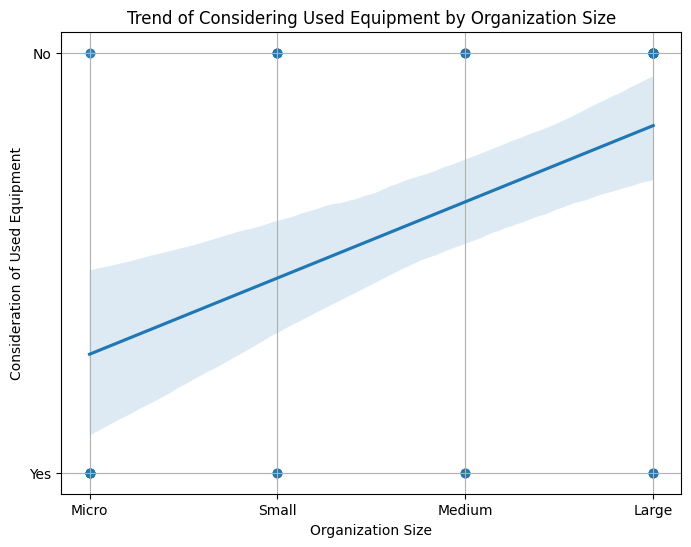

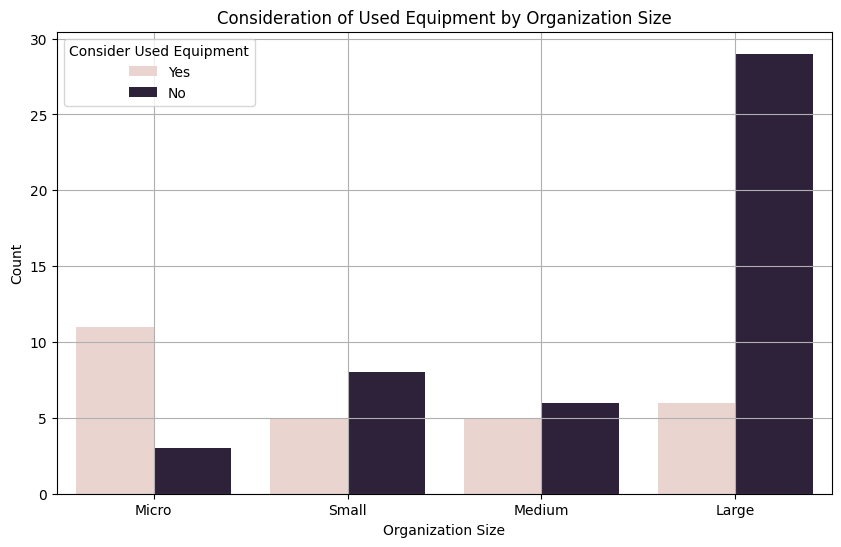

Do you consider used equipment as an option when you make ICT equipment procurement decisions?   1  \
How big is your organization?                                                                        
1                                                                                               11   
2                                                                                                5   
3                                                                                                5   
4                                                                                                6   

Do you consider used equipment as an option when you make ICT equipment procurement decisions?   2  
How big is your organization?                                                                       
1                                                                                                3  
2                                                                                   

In [336]:
# Columns for correlation analysis
correlation_vars = [
    'How big is your organization?',
    'Do you consider used equipment as an option when you make ICT equipment procurement decisions?'
]

# Convert to DataFrame
correlation_data = pd.DataFrame(data[correlation_vars])

# Ensure columns are numeric
correlation_data['How big is your organization?'] = pd.to_numeric(correlation_data['How big is your organization?'])
correlation_data['Do you consider used equipment as an option when you make ICT equipment procurement decisions?'] = pd.to_numeric(correlation_data['Do you consider used equipment as an option when you make ICT equipment procurement decisions?'])

# Check the data types and head of the DataFrame
# print(correlation_data.dtypes)
# print(correlation_data.head())

# Compute the Spearman correlation coefficient
spearman_corr, spearman_p_value = spearmanr(correlation_data['How big is your organization?'], correlation_data['Do you consider used equipment as an option when you make ICT equipment procurement decisions?'])

print("Spearman correlation coefficient:", spearman_corr)
print("P-value:", spearman_p_value)

# Visualization: Scatter Plot with Regression Line
plt.figure(figsize=(8, 6))
sns.regplot(x='How big is your organization?', y='Do you consider used equipment as an option when you make ICT equipment procurement decisions?', data=correlation_data, scatter_kws={'alpha':0.5})
plt.title('Trend of Considering Used Equipment by Organization Size')
plt.xlabel('Organization Size')
plt.ylabel('Consideration of Used Equipment')
# Set the tick locations and labels
plt.xticks(ticks=[1, 2, 3, 4], labels=['Micro', 'Small', 'Medium', 'Large'])  
plt.yticks(ticks=[1, 2], labels=['Yes', 'No'])
plt.grid(True)
plt.show()


# Create a new DataFrame for the bar plot
correlation_data = data[['How big is your organization?', 'Do you consider used equipment as an option when you make ICT equipment procurement decisions?']]

# Bar Plot of Consideration of Used Equipment by Organization Size
plt.figure(figsize=(10, 6))
sns.countplot(x='How big is your organization?', hue='Do you consider used equipment as an option when you make ICT equipment procurement decisions?', data=correlation_data)
plt.title('Consideration of Used Equipment by Organization Size')
plt.xlabel('Organization Size')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Micro', 'Small', 'Medium', 'Large'])  
plt.legend(title='Consider Used Equipment', loc='upper left', labels=['Yes', 'No'])
plt.grid(True)
plt.show()

# # Stacked Bar Plot of Consideration of Used Equipment by Organization Size
# stacked_data = correlation_data.groupby(['How big is your organization?', 'Do you consider used equipment as an option when you make ICT equipment procurement decisions?']).size().unstack().fillna(0)
# stacked_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'orange'])
# plt.title('Consideration of Used Equipment by Organization Size')
# plt.xlabel('Organization Size')
# plt.ylabel('Count')
# plt.xticks(ticks=[0, 1, 2, 3], labels=['Micro', 'Small', 'Medium', 'Large'], rotation=0)  
# plt.legend(title='Consider Used Equipment', labels=['Yes', 'No'])
# plt.grid(True)
# plt.show()

# Count the "Yes" and "No" responses for each organization size
counts = correlation_data.groupby(['How big is your organization?', 'Do you consider used equipment as an option when you make ICT equipment procurement decisions?']).size().unstack().fillna(0)
print(counts)


In [340]:
from scipy.stats import pearsonr


# Columns of interest
likelihood_col = 'How likely do you see purchases of used ICT equipment to increase in the future in your organization? (0 Not at all | 5 Definitely)'
consideration_col = 'Do you consider used equipment as an option when you make ICT equipment procurement decisions?'

# Correlation analysis
correlation_matrix = data[[consideration_col, likelihood_col]].corr(method='spearman')
correlation_coefficient = correlation_matrix.iloc[0, 1]
p_value = correlation_matrix.iloc[0, 1]

# Mean likelihood calculation
mean_likelihood_with_consideration = np.mean(data[data[consideration_col] == 1][likelihood_col])
mean_likelihood_without_consideration = np.mean(data[data[consideration_col] == 0][likelihood_col])

# Print results
print("Correlation coefficient:", correlation_coefficient)
print("P-value:", p_value)
print("Mean likelihood with considering used equipment:", mean_likelihood_with_consideration)
print("Mean likelihood without considering used equipment:", mean_likelihood_without_consideration)



Correlation coefficient: -0.3563858726905273
P-value: -0.3563858726905273
Mean likelihood with considering used equipment: 3.2962962962962963
Mean likelihood without considering used equipment: nan


# Correlation between company size and the importance of responsibility
This analysis values (Spearman correlation coefficient: -0.36477521309701383) indicates a moderate negative correlation between the size of the company and the importance they place on responsibility. In other words, as the company size increases, the importance of responsibility tends to decrease.

Spearman correlation coefficient: -0.3620896764190745
P-value: 0.0016447543464234574


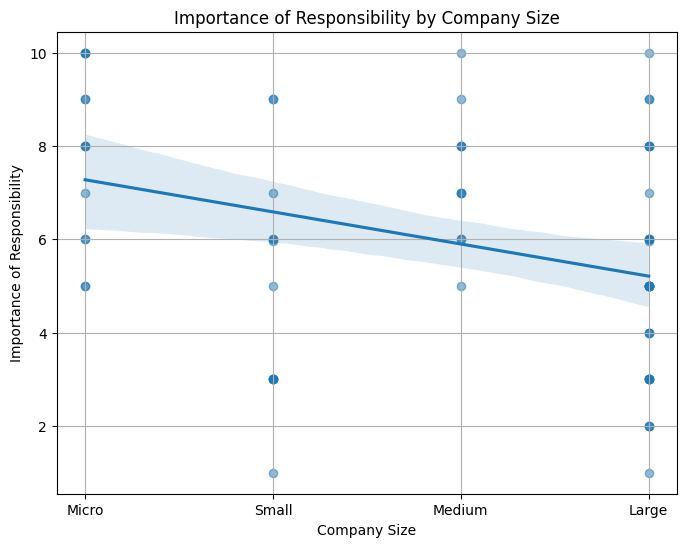

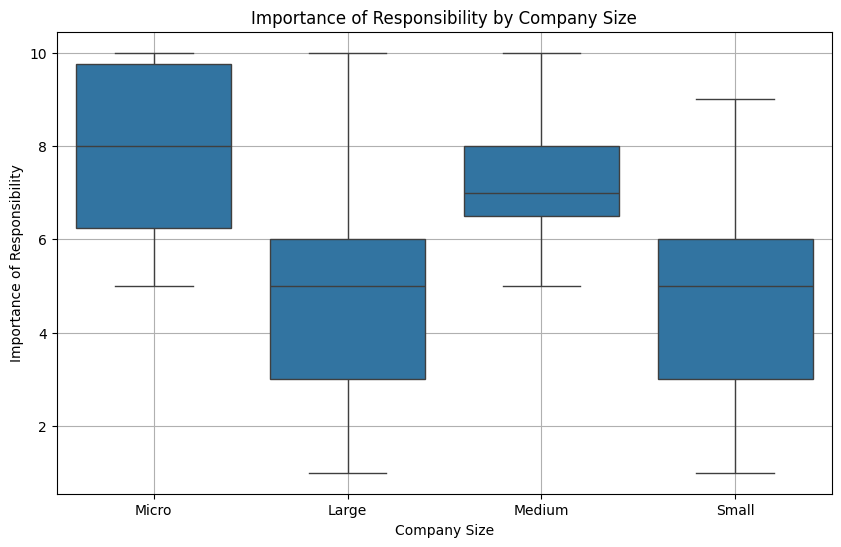

In [345]:
# Renaming columns for easier access
data.rename(columns={
    'How important is price in your ICT equipment purchases? (0 not important | 3 a little | 5 somewhat | 7 a lot | 10 crucially important)': 'Importance of Price',
    'How important is responsibility in your ICT equipment purchases? (0 not important | 3 a little | 5 somewhat | 7 a lot | 10 crucially important)': 'Importance of Responsibility',
    'Will the share of responsibility factors increase in your ICT equipment procurement decisions in the next two years?': 'Increase in Responsibility Factors'
}, inplace=True)

# Columns for correlation analysis
correlation_vars = [
    'How big is your organization?',
    'Importance of Responsibility',
    ]

# subset of the data for correlation analysis
correlation_data = data[correlation_vars]

# Check for missing values
#print("Missing values in 'How big is your organization?':", correlation_data['How big is your organization?'].isnull().sum())
#print("Missing values in 'Importance of Responsibility':", correlation_data['Importance of Responsibility'].isnull().sum())

# Drop missing values
correlation_data = correlation_data.dropna()


# Compute the Spearman correlation coefficient
spearman_corr, spearman_p_value = spearmanr(correlation_data['How big is your organization?'], correlation_data['Importance of Responsibility'])
print("Spearman correlation coefficient:", spearman_corr)
print("P-value:", spearman_p_value)

# Visualization: Scatter Plot with Regression Line
plt.figure(figsize=(8, 6))
sns.regplot(
    x=correlation_data['How big is your organization?'],
    y=correlation_data['Importance of Responsibility'],
    scatter_kws={'alpha': 0.5}
)
plt.title('Importance of Responsibility by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Importance of Responsibility')
plt.xticks(ticks=[1, 2, 3, 4], labels=['Micro', 'Small', 'Medium', 'Large'])
plt.grid(True)
plt.show()


# Box Plot for better understanding
plt.figure(figsize=(10, 6))
sns.boxplot(
    x=correlation_data['How big is your organization?'].map({1: 'Micro', 2: 'Small', 3: 'Medium', 4: 'Large'}),
    y=correlation_data['Importance of Responsibility']
)
plt.title('Importance of Responsibility by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Importance of Responsibility')
plt.grid(True)
plt.show()

# Correlation analysis to identify relationships between different factors.
We can see some strong positive and negative relations among the factors
# In the HeatMap below 
we noticed some strong positive correlations among CO2 information, Responsibility, Regulatory Pressure. Negative correlations among Considered used equipment with Price and Responsibility, CO2 information with Price.

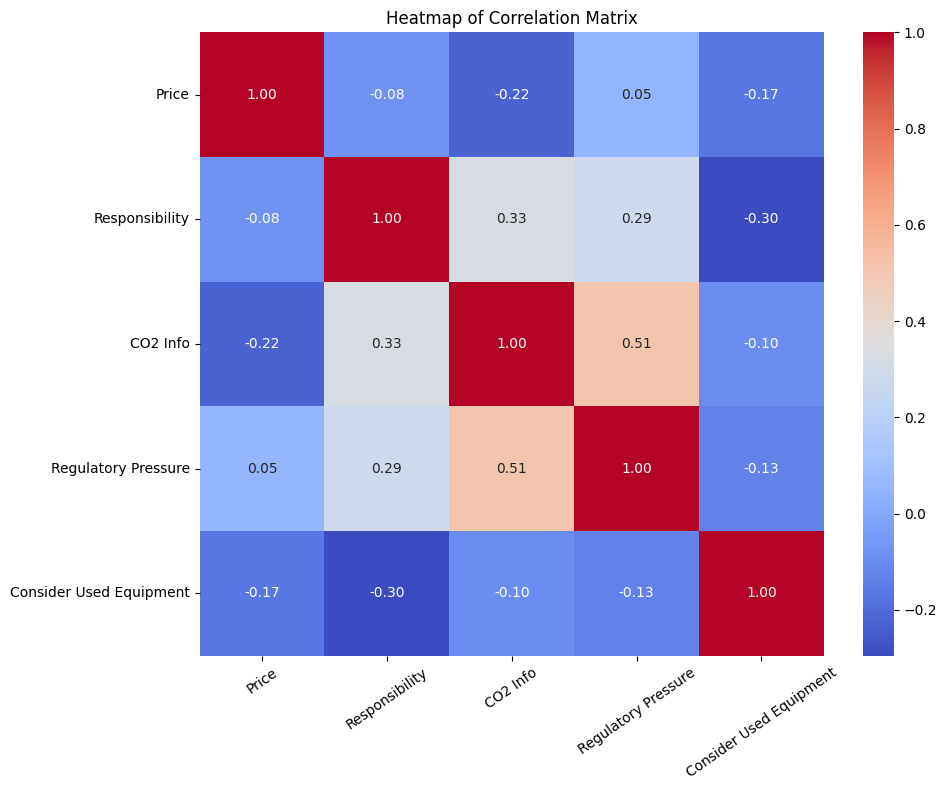

In [346]:
# Define columns for correlation analysis
correlation_columns_factors = [
    'Importance of Price',
    'Importance of Responsibility',
    'Information on CO2 effects',
    'Regulatory pressure to consider responsibility',
    'Do you consider used equipment as an option when you make ICT equipment procurement decisions?'
]

# Select relevant columns for correlation analysis
correlation_data_factors = data[correlation_columns_factors]

# Define shorter labels for correlation analysis
short_labels = {
    'Importance of Price': 'Price',
    'Importance of Responsibility': 'Responsibility',
    'Information on CO2 effects': 'CO2 Info',
    'Regulatory pressure to consider responsibility': 'Regulatory Pressure',
    'Do you consider used equipment as an option when you make ICT equipment procurement decisions?': 'Consider Used Equipment'
}

# Rename columns using shorter labels
correlation_data_short = correlation_data_factors.rename(columns=short_labels)

# Calculate correlation matrix
correlation_matrix = correlation_data_short.corr()

# Plotting the correlation matrix with shorter labels
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation Matrix')
plt.xticks(rotation=35)
plt.tight_layout()
plt.show()


# Factor Analysis and Future trends

Influential factors of sustainable procurement practices:
Considering Used Equipment:
Do you consider used equipment as an option when you make ICT equipment procurement decisions?
No     46
Yes    27
Name: count, dtype: int64

Recycling (Partner Takes Care):
Our partner takes care of decommissioning and recycling the equipment for us
Yes    50
No     23
Name: count, dtype: int64

Information on CO2 Effects:
Information on CO2 effects
Somewhat      16
A Little      14
A Lot         13
Decisively    12
Name: count, dtype: int64

Regulatory Pressure to Consider Responsibility:
Regulatory pressure to consider responsibility
Somewhat      23
A Lot         15
A Little       7
Decisively     5
Name: count, dtype: int64

The wishes of customers and other stakeholders:
The wishes of customers and other stakeholders
Somewhat      16
A Lot         13
A Little      13
Decisively     6
Name: count, dtype: int64

Three-year warranty:
Three-year warranty
Decisively    32
A Lot         20
Somewhat   

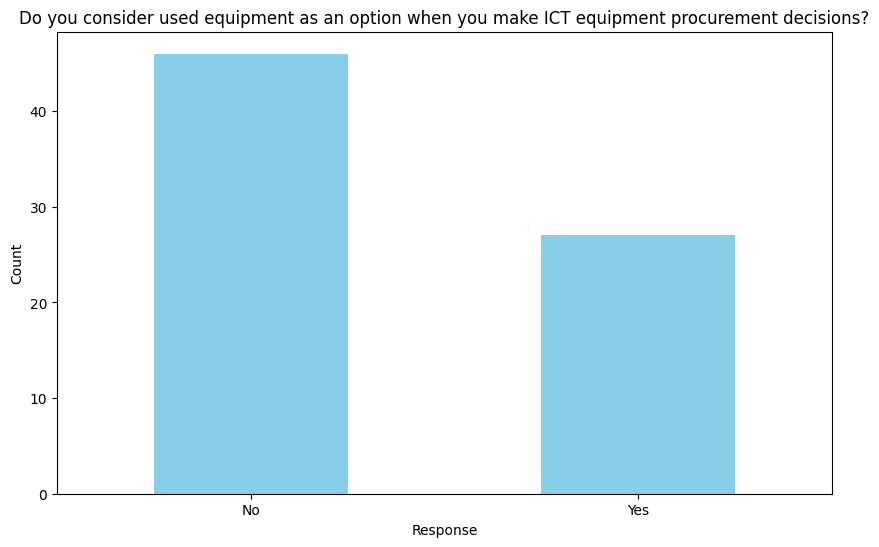

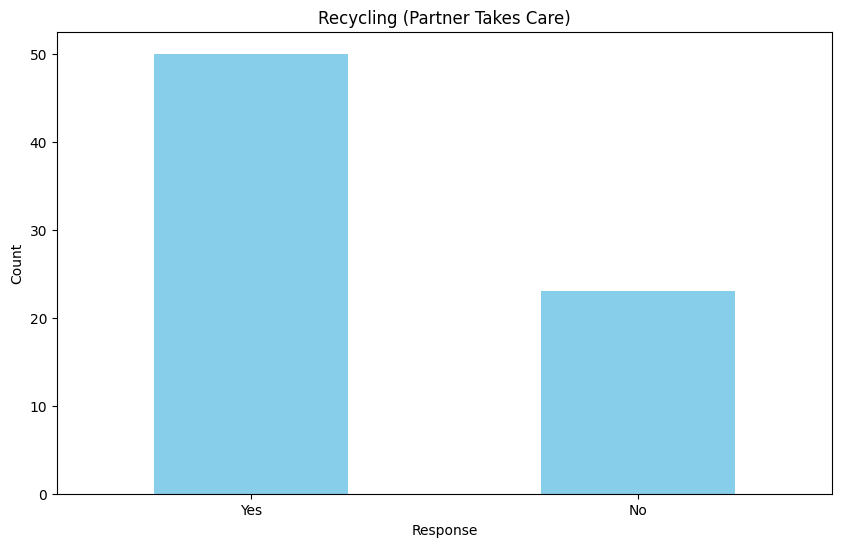

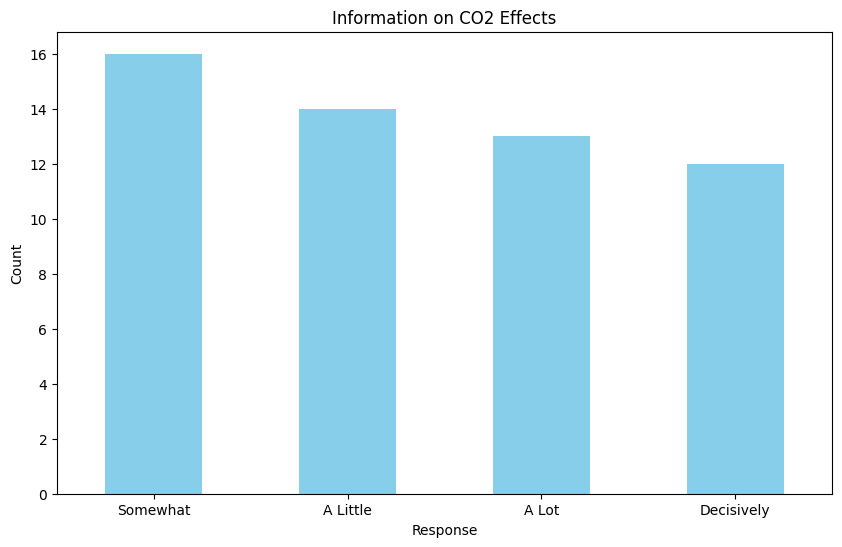

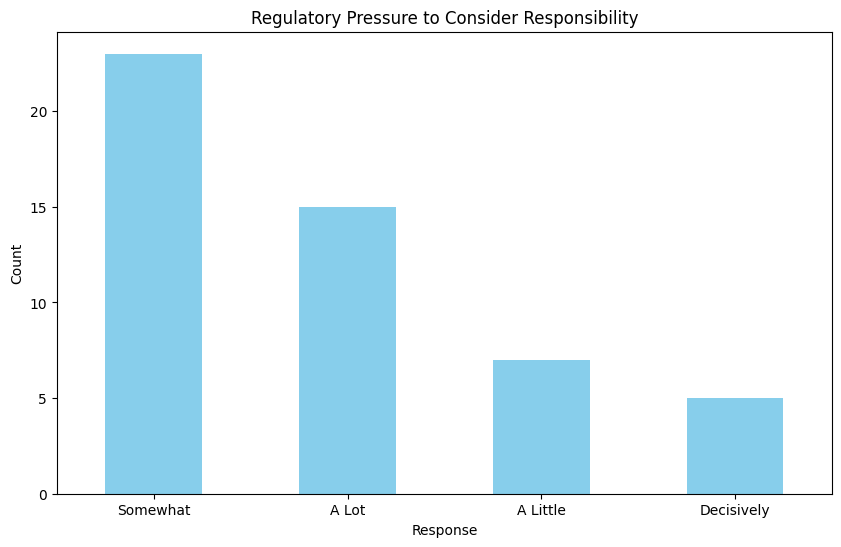

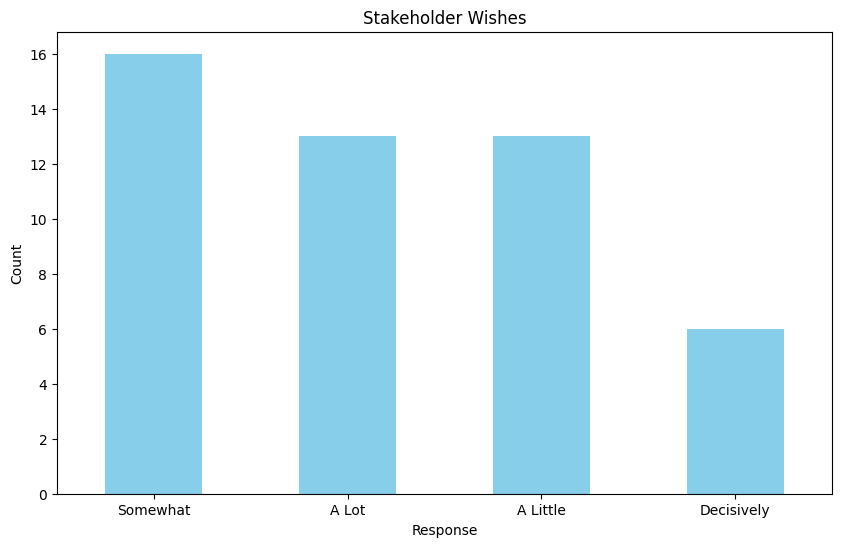

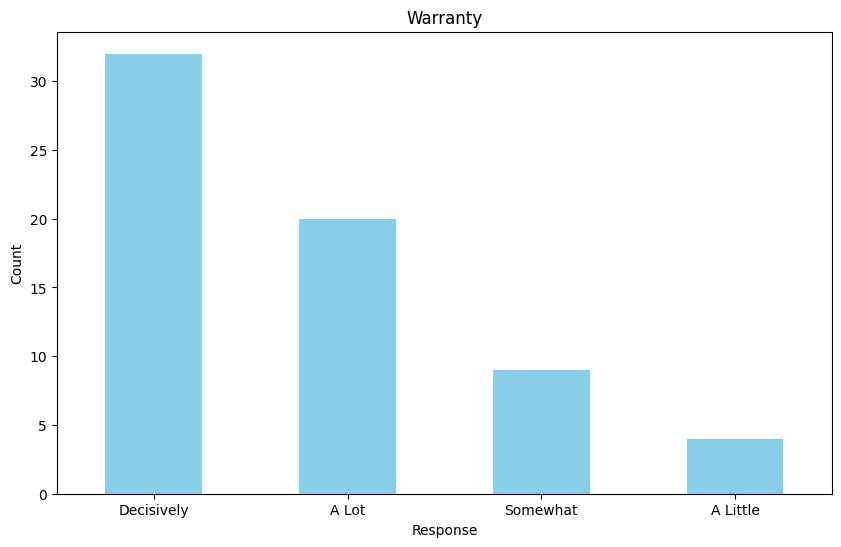

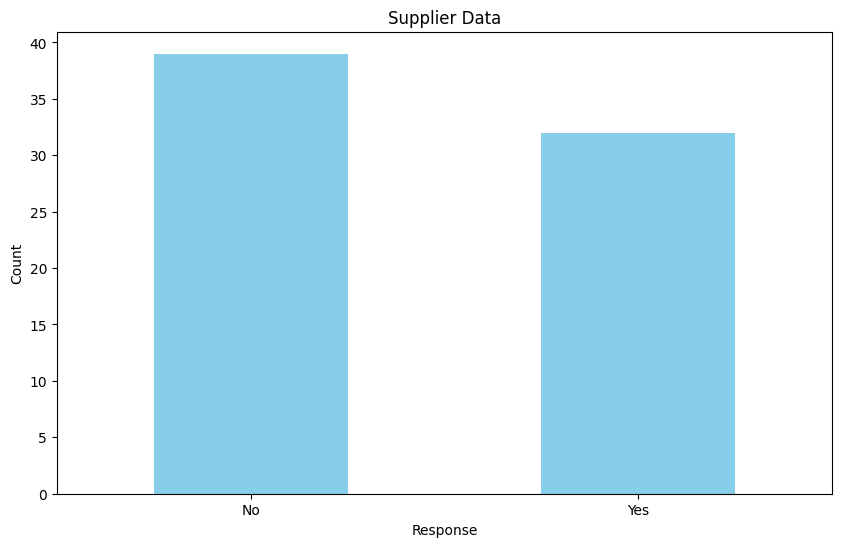

Value counts for considering used equipment:
Do you consider used equipment as an option when you make ICT equipment procurement decisions?
No     46
Yes    27
Name: count, dtype: int64


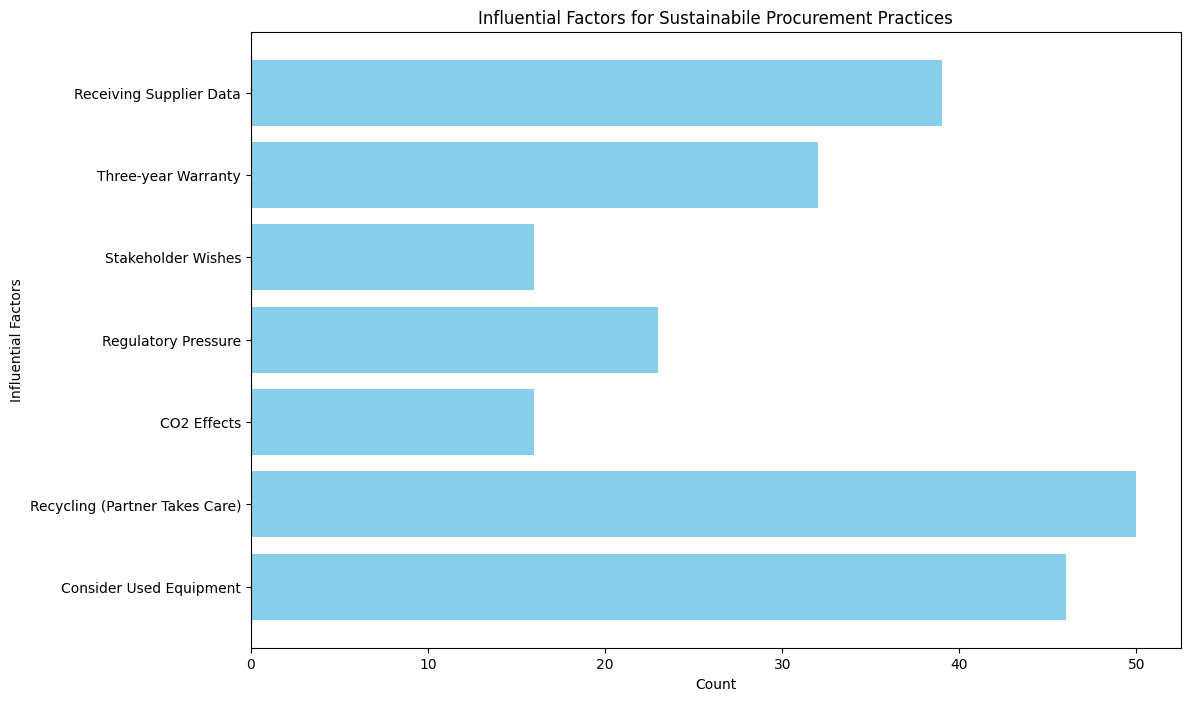

In [347]:
# Define mapping for Likert scale responses
likert_mapping = {
    0: 'No Effect',
    1: 'A Little',
    2: 'A Little',
    3: 'A Little',
    4: 'Somewhat',
    5: 'Somewhat',
    6: 'Somewhat',
    7: 'A Lot',
    8: 'A Lot',
    9: 'Decisively',
    10: 'Decisively'
}

# Define mapping for binary responses
binary_mapping = {
    1: 'Yes',
    2: 'No'
}

# Define mapping for options responses
options_mapping = {
    0: 'No',
    1: 'Yes'
}

# Map numerical values to categories for binary responses
data['Do you consider used equipment as an option when you make ICT equipment procurement decisions?'] = data['Do you consider used equipment as an option when you make ICT equipment procurement decisions?'].map(binary_mapping)
data['Do you receive the necessary information from your equipment supplier for your responsibility work, such as for reporting?'] = data['Do you receive the necessary information from your equipment supplier for your responsibility work, such as for reporting?'].map(binary_mapping)

# Map options values to categories for options responses
data['Our partner takes care of decommissioning and recycling the equipment for us'] = data['Our partner takes care of decommissioning and recycling the equipment for us'].map(options_mapping)

# Map numerical values to categories for Likert scale responses
data['Information on CO2 effects'] = data['Information on CO2 effects'].map(likert_mapping)
data['Regulatory pressure to consider responsibility'] = data['Regulatory pressure to consider responsibility'].map(likert_mapping)
data['The wishes of customers and other stakeholders'] = data['The wishes of customers and other stakeholders'].map(likert_mapping)
data['Three-year warranty'] = data['Three-year warranty'].map(likert_mapping)

# Analyze the influencial factors of sustainable practices
consider_used_equipment_count = data['Do you consider used equipment as an option when you make ICT equipment procurement decisions?'].value_counts()
partner_recycling_count = data['Our partner takes care of decommissioning and recycling the equipment for us'].value_counts()
receiving_supplier_data = data['Do you receive the necessary information from your equipment supplier for your responsibility work, such as for reporting?'].value_counts()

co2_effects_count = data['Information on CO2 effects'].value_counts()
regulatory_pressure_count = data['Regulatory pressure to consider responsibility'].value_counts()
wishes_of_stakeholder_count = data ['The wishes of customers and other stakeholders'].value_counts()
three_year_warranty_count = data ['Three-year warranty'].value_counts()

# Print the counts
print("Influential factors of sustainable procurement practices:")
print("Considering Used Equipment:")
print(consider_used_equipment_count)
print("\nRecycling (Partner Takes Care):")
print(partner_recycling_count)
print("\nInformation on CO2 Effects:")
print(co2_effects_count)
print("\nRegulatory Pressure to Consider Responsibility:")
print(regulatory_pressure_count)
print("\nThe wishes of customers and other stakeholders:")
print(wishes_of_stakeholder_count)
print("\nThree-year warranty:")
print(three_year_warranty_count)
print("\nReceiving Supplier Data:")

# Function to create bar plots
def plot_bar(data, title):
    plt.figure(figsize=(10, 6))
    data.plot(kind='bar', color='skyblue')
    plt.title(title)
    plt.xlabel('Response')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

# Considering Used Equipment
plot_bar(consider_used_equipment_count, 'Do you consider used equipment as an option when you make ICT equipment procurement decisions?')

# Recycling (Partner Takes Care)
plot_bar(partner_recycling_count, 'Recycling (Partner Takes Care)')

# Information on CO2 Effects
plot_bar(co2_effects_count, 'Information on CO2 Effects')

# Regulatory Pressure to Consider Responsibility
plot_bar(regulatory_pressure_count, 'Regulatory Pressure to Consider Responsibility')

plot_bar(wishes_of_stakeholder_count, 'Stakeholder Wishes')

plot_bar(three_year_warranty_count, 'Warranty')

plot_bar(receiving_supplier_data, 'Supplier Data')

# Print the value counts for considering used equipment
print("Value counts for considering used equipment:")
print(consider_used_equipment_count)

# Define the factors and their counts
factors = ['Consider Used Equipment', 'Recycling (Partner Takes Care)', 'CO2 Effects', 'Regulatory Pressure', 'Stakeholder Wishes', 'Three-year Warranty', 'Receiving Supplier Data']
counts = [consider_used_equipment_count, partner_recycling_count, co2_effects_count, regulatory_pressure_count, wishes_of_stakeholder_count, three_year_warranty_count, receiving_supplier_data]

 #Plotting the grouped bar chart
plt.figure(figsize=(12, 8))
for i in range(len(factors)):
    plt.barh(factors[i], counts[i], color='skyblue')

plt.xlabel('Count')
plt.ylabel('Influential Factors')
plt.title('Influential Factors for Sustainabile Procurement Practices')
plt.show()



# Negative Factors Affecting Used Equipment Purchase

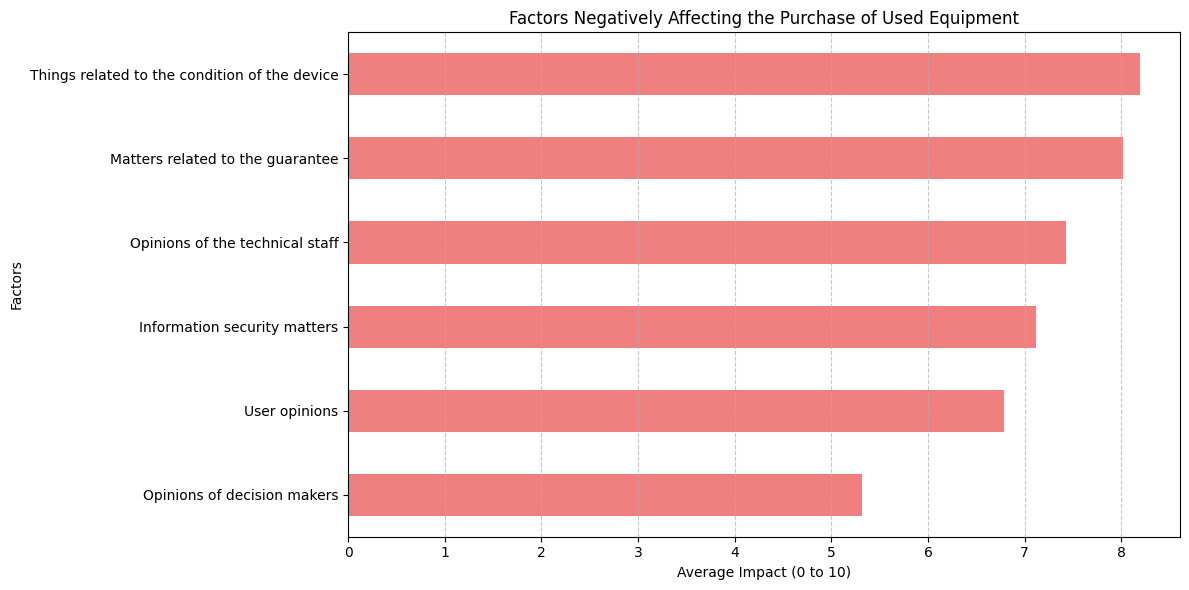

In [ ]:

# columns for negative factors
negative_factors = [
    'Information security matters',
    'Matters related to the guarantee',
    'Things related to the condition of the device',
    'Opinions of decision makers',
    'Opinions of the technical staff',
    'User opinions'
]

# mean impact score for each factor
factor_means = data[negative_factors].mean()

# Plotting
plt.figure(figsize=(12, 6))
factor_means.sort_values().plot(kind='barh', color='lightcoral')
plt.title('Factors Negatively Affecting the Purchase of Used Equipment')
plt.xlabel('Average Impact (0 to 10)')
plt.ylabel('Factors')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Respondent ID                                                                                                                                        int64
How big is your organization?                                                                                                                        int64
How often do you purchase ICT equipment?                                                                                                             int64
We acquire ICT equipment using the leasing procedure                                                                                                 int64
We procure ICT equipment using the DaaS procedure (device as a service)                                                                              int64
We acquire ICT equipment by purchasing                                                                                                               int64
Do you consider used equipment as an option when you make ICT equipmen

# Identify Barriers and Enablers for Sustainable Procurement

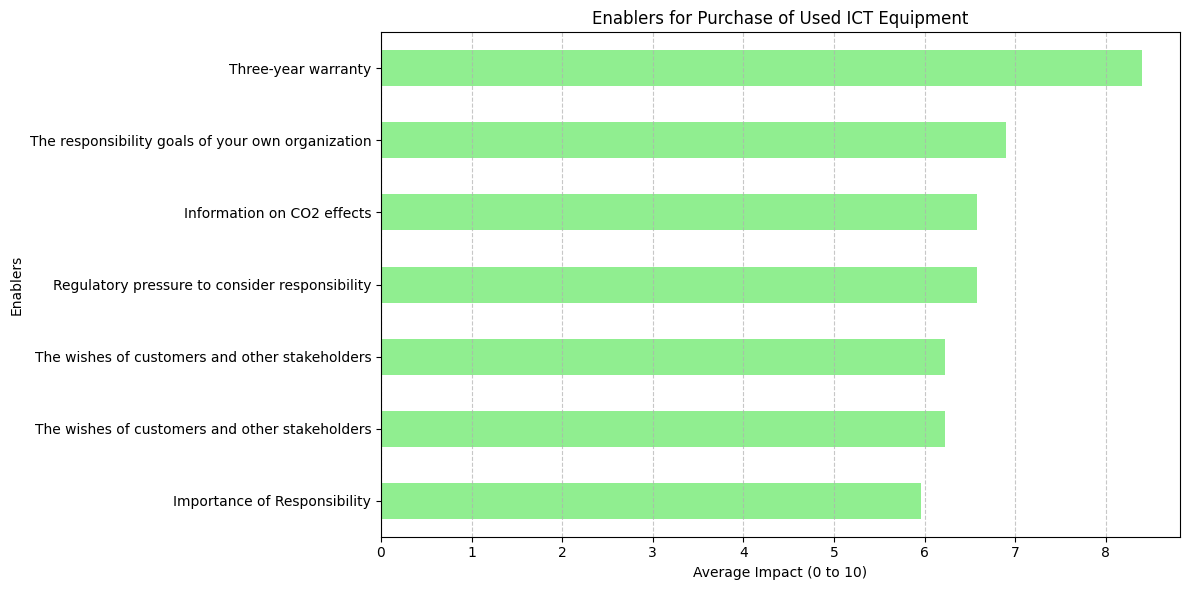

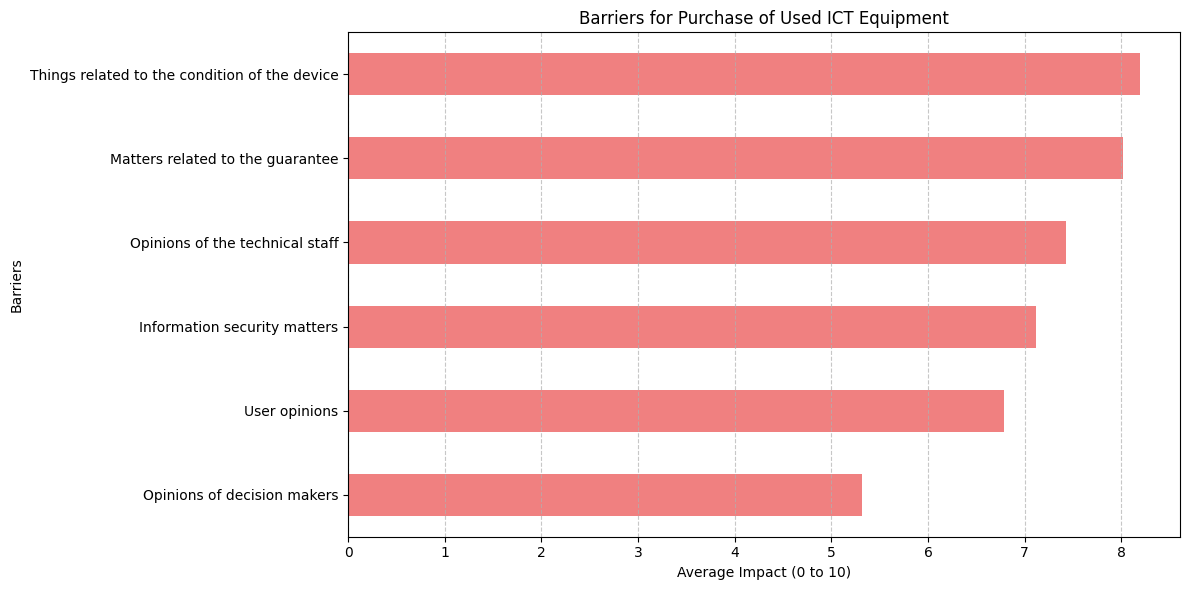

In [ ]:
# # Renaming columns for easier access
# data.rename(columns={
#     'How important is price in your ICT equipment purchases? (0 not important | 3 a little | 5 somewhat | 7 a lot | 10 crucially important)': 'Importance of Price',
#     'How important is responsibility in your ICT equipment purchases? (0 not important | 3 a little | 5 somewhat | 7 a lot | 10 crucially important)': 'Importance of Responsibility',
#     'Will the share of responsibility factors increase in your ICT equipment procurement decisions in the next two years?': 'Increase in Responsibility Factors'
# }, inplace=True)

# Define enablers and barriers
enablers = [
    'Information on CO2 effects',
    'Regulatory pressure to consider responsibility',
    'The wishes of customers and other stakeholders',
    'The responsibility goals of your own organization',
    'Importance of Responsibility',
    'Three-year warranty',
    'The wishes of customers and other stakeholders'
]

# Define barriers
barriers = [
    'Information security matters',
    'Matters related to the guarantee',
    'Things related to the condition of the device',
    'Opinions of decision makers',
    'Opinions of the technical staff',
    'User opinions'
]

# Reverse Likert scale mapping
likert_mapping_reverse = {v: k for k, v in likert_mapping.items()}

# Reverse binary mapping
binary_mapping_reverse = {v: k for k, v in binary_mapping.items()}

# Reverse options mapping
options_mapping_reverse = {v: k for k, v in options_mapping.items()}

# Reverse the mapping for Likert scale responses
data['Information on CO2 effects'] = data['Information on CO2 effects'].map(likert_mapping_reverse)
data['Regulatory pressure to consider responsibility'] = data['Regulatory pressure to consider responsibility'].map(likert_mapping_reverse)
data['The wishes of customers and other stakeholders'] = data['The wishes of customers and other stakeholders'].map(likert_mapping_reverse)
data['Three-year warranty'] = data['Three-year warranty'].map(likert_mapping_reverse)

# Reverse the mapping for binary responses
data['Do you consider used equipment as an option when you make ICT equipment procurement decisions?'] = data['Do you consider used equipment as an option when you make ICT equipment procurement decisions?'].map(binary_mapping_reverse)
data['Do you receive the necessary information from your equipment supplier for your responsibility work, such as for reporting?'] = data['Do you receive the necessary information from your equipment supplier for your responsibility work, such as for reporting?'].map(binary_mapping_reverse)

# Reverse the mapping for options responses
data['Our partner takes care of decommissioning and recycling the equipment for us'] = data['Our partner takes care of decommissioning and recycling the equipment for us'].map(options_mapping_reverse)

# Calculate mean impact score for each enabler
enabler_means = data[enablers].mean()

# Calculate mean impact score for each barrier
barrier_means = data[barriers].mean()



# Plotting Enablers
plt.figure(figsize=(12, 6))
enabler_means.sort_values().plot(kind='barh', color='lightgreen')
plt.title('Enablers for Purchase of Used ICT Equipment')
plt.xlabel('Average Impact (0 to 10)')
plt.ylabel('Enablers')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Plotting Barriers
plt.figure(figsize=(12, 6))
barrier_means.sort_values().plot(kind='barh', color='lightcoral')
plt.title('Barriers for Purchase of Used ICT Equipment')
plt.xlabel('Average Impact (0 to 10)')
plt.ylabel('Barriers')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

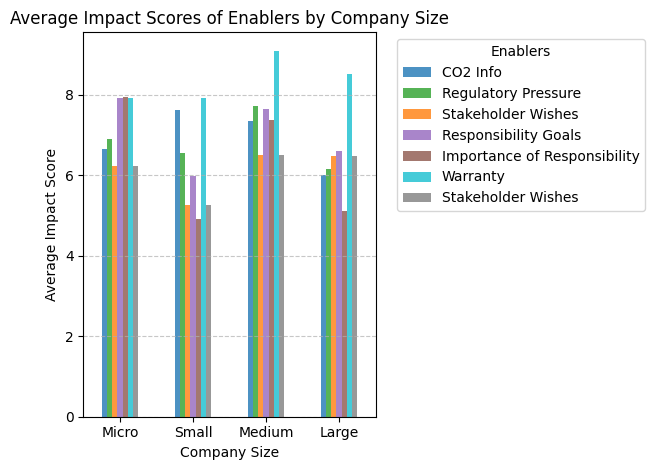

<Figure size 1200x600 with 0 Axes>

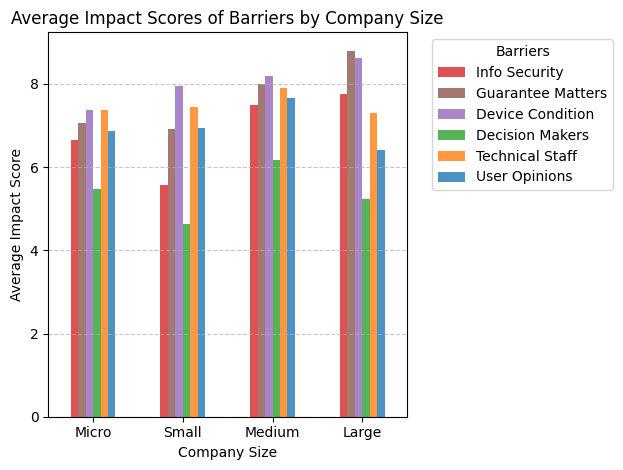

In [ ]:
# Group data by organization size and calculate mean impact scores for enablers
enablers_data = data[enablers].groupby(data['How big is your organization?']).mean()

# Group data by organization size and calculate mean impact scores for barriers
barrier_data = data[barriers].groupby(data['How big is your organization?']).mean()

# Shorten legend titles
enablers_legend_labels = [
    'CO2 Info',
    'Regulatory Pressure',
    'Stakeholder Wishes',
    'Responsibility Goals',
    'Importance of Responsibility',
    'Warranty',
    'Stakeholder Wishes'
]
# Shorten legend titles
barriers_legend_labels = [
    'Info Security',
    'Guarantee Matters',
    'Device Condition',
    'Decision Makers',
    'Technical Staff',
    'User Opinions'
]

# Define custom color palettes for enablers and barriers
enablers_colors = ['#1f77b4', '#2ca02c', '#ff7f0e', '#9467bd', '#8c564b', '#17becf', '#7f7f7f']  # Adjusted colors for enablers
barriers_colors = ['#d62728', '#8c564b', '#9467bd', '#2ca02c', '#ff7f0e', '#1f77b4']  # Adjusted colors for barriers

# Plotting the enablers
plt.figure(figsize=(12, 6))
ax1 = enablers_data.plot(kind='bar', color=enablers_colors, alpha=0.8)
plt.title('Average Impact Scores of Enablers by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Average Impact Score')

# Update x-axis labels to company sizes
ax1.set_xticklabels(['Micro', 'Small', 'Medium', 'Large'], rotation=0, ha='center')
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, enablers_legend_labels, title='Enablers', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Plotting the barriers
plt.figure(figsize=(12, 6))
ax2 = barrier_data.plot(kind='bar', color=barriers_colors, alpha=0.8)
plt.title('Average Impact Scores of Barriers by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Average Impact Score')

# Update x-axis labels to company sizes
ax2.set_xticklabels(['Micro', 'Small', 'Medium', 'Large'], rotation=0, ha='center')
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles, barriers_legend_labels, title='Barriers', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Assessing the importance of price, responsibility, and future trends in ICT equipment purchases.

Mean Importance Score for Price: 6.971830985915493
Mean Importance Score for Responsibility: 5.957746478873239
Proportion of Positive Future Trends: 0.5753424657534246
Proportion of Negative Future Trends: 0.410958904109589


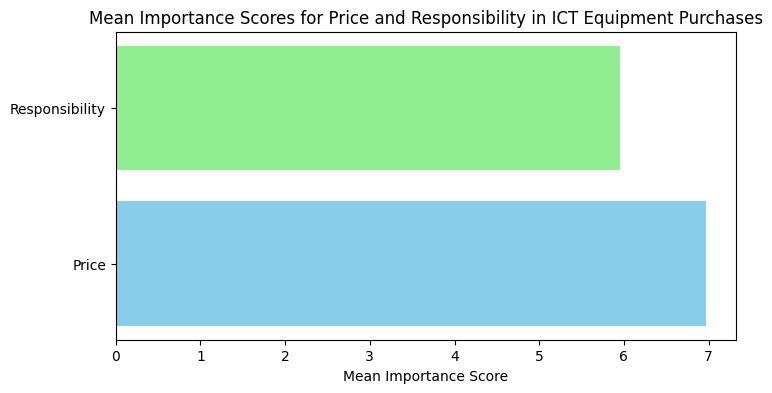

In [ ]:


# Calculate the mean importance score for price
price_importance_mean = data['Importance of Price'].mean()

# Calculate the mean importance score for responsibility
responsibility_importance_mean = data['Importance of Responsibility'].mean()

# Analyze the future trend
future_trend_counts = data['Increase in Responsibility Factors'].value_counts()

# Calculate the proportion of positive and negative trends
positive_trend_proportion = future_trend_counts[1] / len(data)
negative_trend_proportion = future_trend_counts[2] / len(data)

# Print the results
print(f"Mean Importance Score for Price: {price_importance_mean}")
print(f"Mean Importance Score for Responsibility: {responsibility_importance_mean}")
print(f"Proportion of Positive Future Trends: {positive_trend_proportion}")
print(f"Proportion of Negative Future Trends: {negative_trend_proportion}")

# Calculate means
#sustainability_means = data[['Importance of Price', 'Importance of Responsibility', 'Increase in Responsibility Factors']].mean()

# # Plotting
# plt.figure(figsize=(12, 6))
# sustainability_means.plot(kind='bar', color=['skyblue', 'lightgreen', 'lightcoral'])
# plt.title('Sustainability Factors in ICT Equipment Procurement')
# plt.xlabel('Factors')
# plt.ylabel('Average Importance (0 to 10)')
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# # Rotate x-axis labels
# plt.xticks(rotation=0)
# plt.tight_layout()
# plt.show()

# Visualization of the mean importance scores for price and responsibility
plt.figure(figsize=(8, 4))  # Adjust the figure size

# Price importance
plt.barh(['Price'], [price_importance_mean], color='skyblue', label='Price Importance')

# Responsibility importance
plt.barh(['Responsibility'], [responsibility_importance_mean], color='lightgreen', label='Responsibility Importance')

plt.xlabel('Mean Importance Score')
plt.title('Mean Importance Scores for Price and Responsibility in ICT Equipment Purchases')

#plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
# set y-axis ticks and labels
plt.yticks([0, 1], ['Price', 'Responsibility'])

plt.show()


# Mean Importance Scores:
   - Price: 6.780821917808219
   - Responsibility: 5.794520547945205

   The mean importance scores indicate the relative importance of price and responsibility factors in ICT equipment purchases. 
   Higher scores suggest greater importance.

# Comparison Across Organization Sizes:
Analyzing how the importance of price, responsibility, and other factors varies across different organization sizes.

<Figure size 1200x800 with 0 Axes>

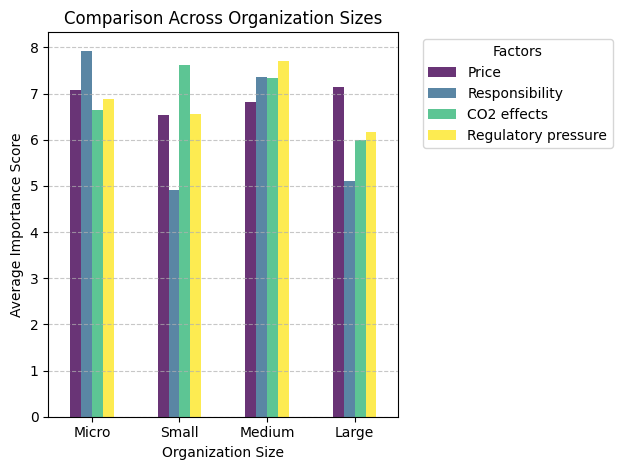

In [ ]:
# Define columns for comparison
comparison_columns = [
    'How big is your organization?',
    'Importance of Price',
    'Importance of Responsibility',
    'Information on CO2 effects',
    'Regulatory pressure to consider responsibility'
]

# Group data by organization size and calculate mean importance scores
comparison_data = data[comparison_columns].groupby('How big is your organization?').mean()

# Define the labels for the x-axis
org_size_labels = ['Micro', 'Small', 'Medium', 'Large']

# Plotting the comparison
plt.figure(figsize=(12, 8))
ax = comparison_data.plot(kind='bar', colormap='viridis', alpha=0.8)
plt.title('Comparison Across Organization Sizes')
plt.xlabel('Organization Size')
plt.ylabel('Average Importance Score')
plt.xticks(range(len(org_size_labels)), org_size_labels, rotation=0)  # Set custom labels
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Move the legend outside the plot area to the right
plt.legend(title='Factors', bbox_to_anchor=(1.05, 1), loc='upper left')

# Shorten legend titles
legend_labels = [
    'Price',
    'Responsibility',
    'CO2 effects',
    'Regulatory pressure'
]
for i, text in enumerate(ax.get_legend().get_texts()):
    text.set_text(legend_labels[i])

# Adjust layout to prevent the legend from overlapping with the plot
plt.tight_layout()

plt.show()


# Future Trends in Purchasing Used ICT Equipment

The histogram above illustrates the likelihood of organizations increasing their purchases of used ICT equipment in the future. The x-axis represents the likelihood scale ranging from 0 (Not at all likely) to 5 (Definitely likely), while the y-axis indicates the frequency of responses.

By analyzing this data, we gain insights into the future trends in ICT equipment procurement. Higher frequencies towards the right end of the histogram indicate a greater propensity among organizations to consider increasing their purchases of used ICT equipment. This suggests a potential shift in procurement strategies towards the adoption of more sustainable and cost-effective practices in the acquisition of ICT products.

Understanding the likelihood of increasing purchases of used ICT equipment is valuable for organizations in strategic planning and decision-making processes. It informs stakeholders about emerging trends in the ICT procurement landscape, facilitating the alignment of organizational strategies with evolving market dynamics and sustainability objectives.

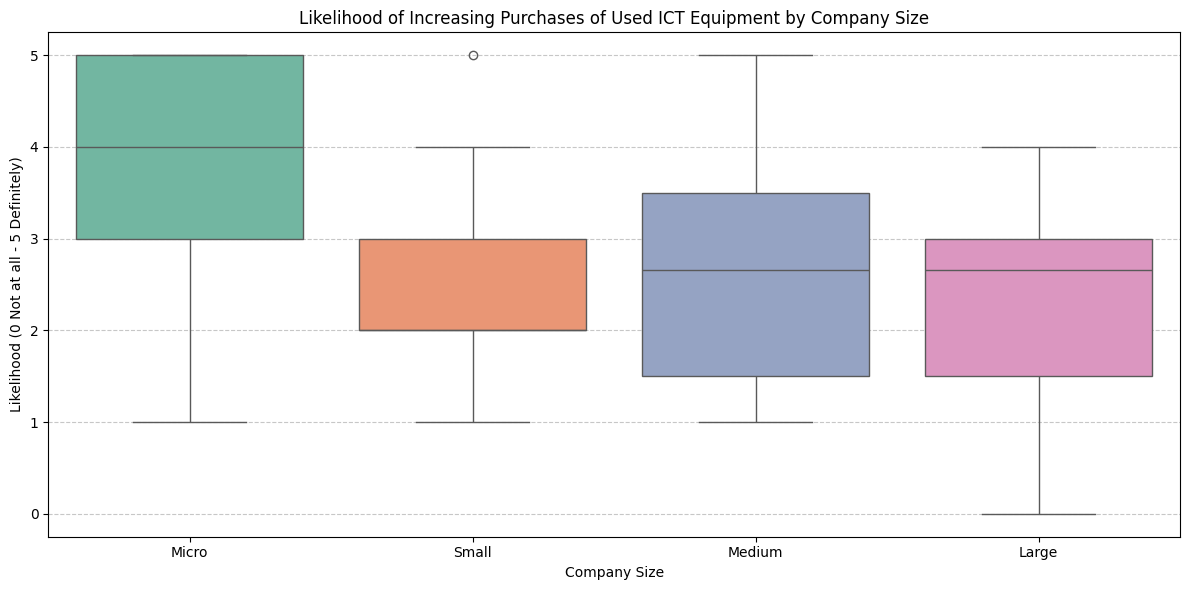

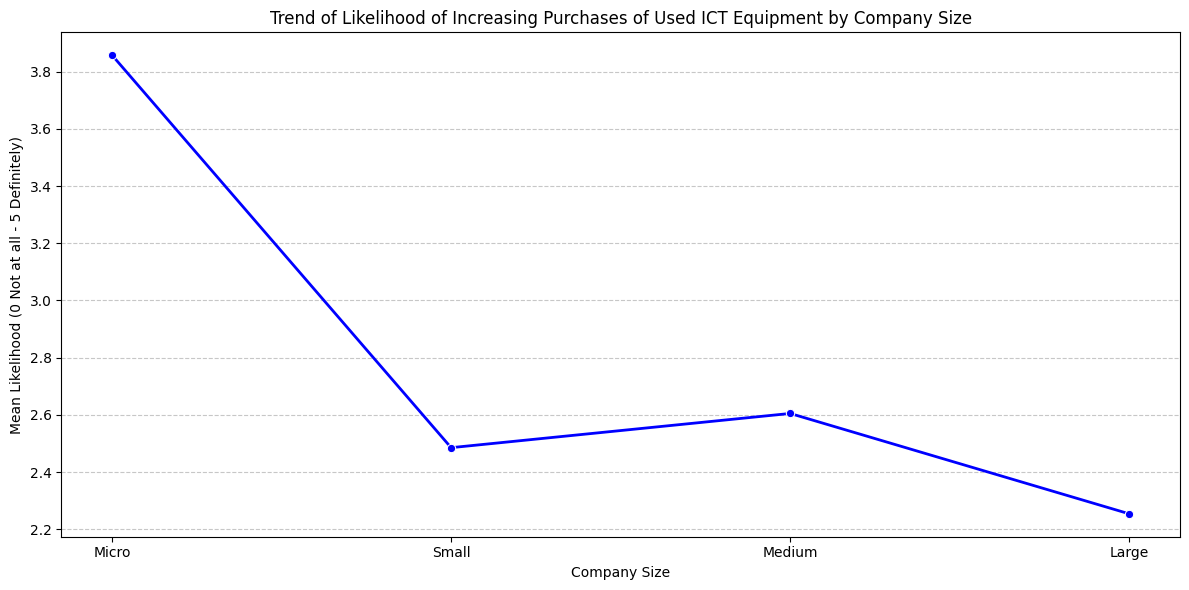

In [ ]:
# Column for likelihood of increasing purchases of used equipment
likelihood_col = 'How likely do you see purchases of used ICT equipment to increase in the future in your organization? (0 Not at all | 5 Definitely)'

# Define company size categories
company_size_categories = {
    1: 'Micro',
    2: 'Small',
    3: 'Medium',
    4: 'Large'
}

# Plotting for each company size category
# plt.figure(figsize=(12, 6))

# for size, label in company_size_categories.items():
#     plt.hist(data[data['How big is your organization?'] == size][likelihood_col], 
#              bins=10, alpha=0.5, label=label)

# plt.title('Likelihood of Increasing Purchases of Used ICT Equipment by Company Size')
# plt.xlabel('Likelihood (0 Not at all - 5 Definitely)')
# plt.ylabel('Frequency')
# plt.legend(title='Company Size')
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.tight_layout()
# plt.show()

# Plotting a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='How big is your organization?', y=likelihood_col, data=data, hue='How big is your organization?', palette='Set2', legend=False)
plt.title('Likelihood of Increasing Purchases of Used ICT Equipment by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Likelihood (0 Not at all - 5 Definitely)')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Micro', 'Small', 'Medium', 'Large'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Calculate mean likelihood for each company size category
mean_likelihood_by_size = data.groupby('How big is your organization?')[likelihood_col].mean()

# Plotting the trend using a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=mean_likelihood_by_size.index, y=mean_likelihood_by_size.values, marker='o', color='b', linewidth=2)
plt.title('Trend of Likelihood of Increasing Purchases of Used ICT Equipment by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Mean Likelihood (0 Not at all - 5 Definitely)')
plt.xticks(ticks=[1, 2, 3, 4], labels=['Micro', 'Small', 'Medium', 'Large'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



# Future Trends of Responsibility factors in ICT Equipment Procurement Decisions:
   - Proportion of Positive Trends: 58.3%
   - Proportion of Negative Trends: 41.7%

   Understanding the future trends helps anticipate shifts in procurement strategies, enabling organizations to adapt 
   and make informed decisions.

The analysis indicates that there is expected positive trends in the share of responsibility factors in ICT equipment procurement decisions 
   over the next two years. 

   These findings are valuable for understanding the evolving landscape of ICT equipment procurement, particularly 
   in terms of integrating responsibility factors into decision-making processes.


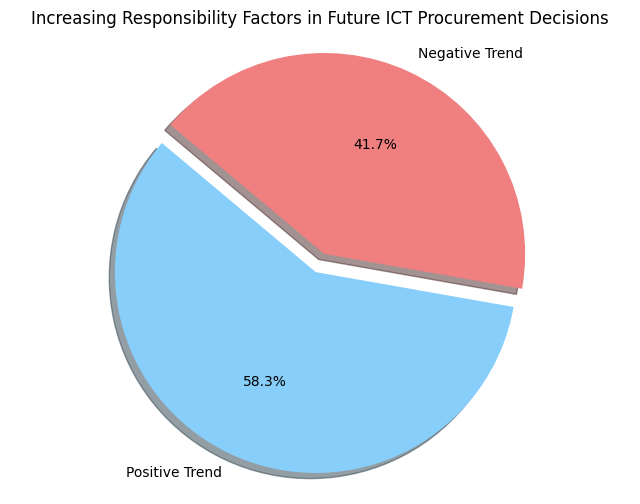

In [ ]:
# Visualize the future trends
plt.figure(figsize=(8, 6))
labels = ['Positive Trend', 'Negative Trend']
sizes = [positive_trend_proportion, negative_trend_proportion]
colors = ['lightskyblue', 'lightcoral']
explode = (0.1, 0)  

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Increasing Responsibility Factors in Future ICT Procurement Decisions')
plt.axis('equal')
plt.show()


# Influence of Stakeholder Opinions
A bar plot showing the average scores of stakeholder opinions for organizations that consider used equipment and those that do not. Each bar represents a stakeholder opinion, and the colors differentiate between organizations that consider used equipment and those that do not.

<Figure size 1200x800 with 0 Axes>

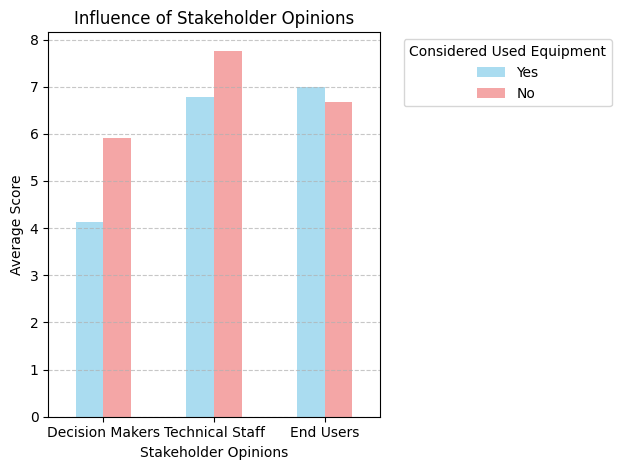

In [ ]:
# Define columns for stakeholder opinions
stakeholder_columns = [
    'Opinions of decision makers',
    'Opinions of the technical staff',
    'User opinions'
]

# Calculate the mean scores for stakeholder opinions for organizations considering and not considering used equipment
stakeholder_data = data.groupby('Do you consider used equipment as an option when you make ICT equipment procurement decisions?')[stakeholder_columns].mean().T

# Plotting the influence of stakeholder opinions using bar plots
plt.figure(figsize=(12, 8))
stakeholder_data.plot(kind='bar', color=['skyblue', 'lightcoral'], alpha=0.7)
plt.title('Influence of Stakeholder Opinions')
plt.xlabel('Stakeholder Opinions')
plt.ylabel('Average Score')
# Set the x-axis ticks and labels
plt.xticks(rotation=0, ha='center', ticks=[0, 1, 2], labels=['Decision Makers', 'Technical Staff', 'End Users'])
plt.legend(title='Considered Used Equipment', loc='upper left', labels=['Yes', 'No'], bbox_to_anchor=(1.05, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Based on the mean importance scores:

When respondents answered "Yes" to receiving necessary information from their equipment supplier for responsibility work, the mean importance score for responsibility in ICT equipment purchases is 5.875.
When respondents answered "No", the mean importance score is 5.74359.
These mean values suggest that there is a slightly higher perceived importance of responsibility in ICT equipment purchases among those who receive necessary information from their equipment supplier compared to those who do not.







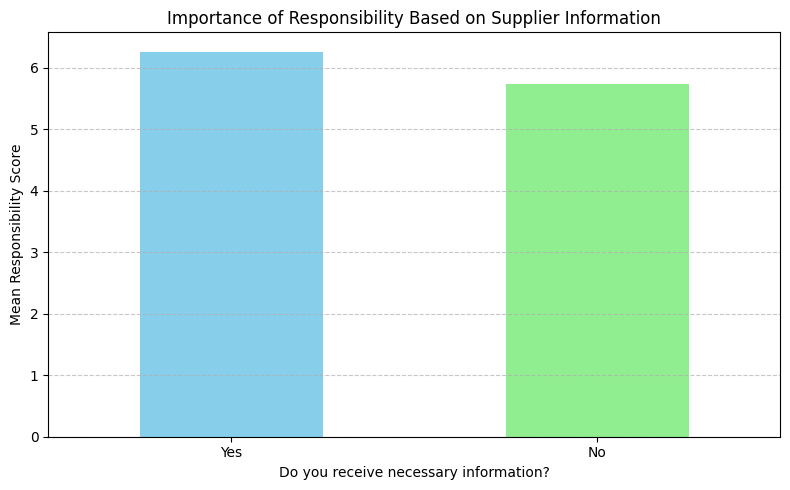

In [ ]:

# Filter the data to include only "Yes" (1) and "No" (2) responses
filtered_data = data[data['Do you receive the necessary information from your equipment supplier for your responsibility work, such as for reporting?'].isin([1, 2])]

# Calculate the mean responsibility score for each group
mean_responsibility = filtered_data.groupby('Do you receive the necessary information from your equipment supplier for your responsibility work, such as for reporting?')['Importance of Responsibility'].mean()

# Plotting
plt.figure(figsize=(8, 5))
mean_responsibility.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Importance of Responsibility Based on Supplier Information')
plt.xlabel('Do you receive necessary information?')
plt.ylabel('Mean Responsibility Score')
plt.xticks([0, 1], ['Yes', 'No'])  # Adjust x-axis labels
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()






# Top 5 most used words by the respondents when asked about recieving neccessary data from the supplier for responsibility reporting.

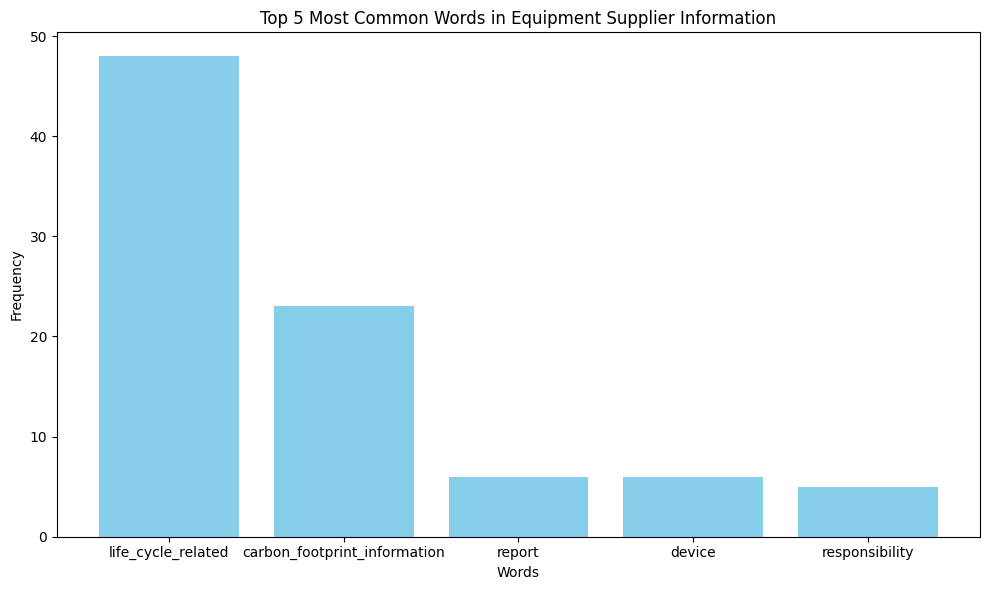

In [ ]:
from collections import Counter
import spacy
import string
import matplotlib.pyplot as plt

# Load the English language model
nlp = spacy.load("en_core_web_sm")

# Define a function for tokenization
def tokenize_text(text):
    doc = nlp(text)
    return [token.text.lower() for token in doc if not token.is_punct and not token.is_stop]

# Define a function to preprocess tokens
def preprocess_tokens(tokens):
    preprocessed_tokens = []
    for token in tokens:
        if token.lower() in ['co2', 'co2 emissions', 'co2 footprint', 'carbon footprint data', 'carbon footprint readings', 'co2 measurements']:
            preprocessed_tokens.append('carbon_footprint_information')
        else:
            preprocessed_tokens.append(token)
    return preprocessed_tokens

# Combine the two columns into one
combined_responses = (
    data['What information do you receive from your equipment supplier for your responsibility work?'].fillna('').astype(str) + 
    ' ' + 
    data['What information do you want to receive from your equipment supplier for your responsibility work?'].fillna('').astype(str)
)

# Tokenize the combined responses
tokens = [tokenize_text(response) for response in combined_responses]

# Preprocess the tokens
preprocessed_tokens = [preprocess_tokens(token_list) for token_list in tokens]

# Flatten the list of preprocessed tokens
preprocessed_flat_tokens = [word for sublist in preprocessed_tokens for word in sublist]

# Count the frequency of each word
word_counts = Counter(preprocessed_flat_tokens)

# Remove the combined category if already exists
if 'carbon_footprint_information' in word_counts:
    del word_counts['carbon_footprint_information']

if 'life_cycle_related' in word_counts:
    del word_counts['life_cycle_related']

# Combine the frequencies of similar terms
combined_frequency = sum(word_counts[word] for word in ['co2', 'emissions', 'footprint', 'carbon footprint data', 'footprint', 'readings', 'measurements'])
word_counts['carbon_footprint_information'] = combined_frequency

combined_frequency_life_cycle = sum(word_counts[word] for word in ['energy', 'information', 'equipment', 'recycle', 'recycling', 'disposal', 'use', 'circular', 'life', 'cycle', 'manufacture', 'manufacturing'])
word_counts['life_cycle_related'] = combined_frequency_life_cycle

# Remove the individual terms
for term in ['co2', 'emissions', 'co2 footprint', 'carbon', 'footprint', 'readings', 'measurements', 'data']:
    if term in word_counts:
        del word_counts[term]

for term1 in ['energy', 'information', 'equipment', 'recycle', 'recycling', 'disposal', 'use', 'circular', 'life', 'cycle', 'manufacture','manufacturing']:
    if term1 in word_counts:
        del word_counts[term1]

# Remove empty strings and '0' from word_counts if they exist
for key in list(word_counts.keys()):
    if key.strip() == '' or key == '0':
        del word_counts[key]

# Get the most common words and their frequencies
common_words = [word[0] for word in word_counts.most_common(5)]
word_frequencies = [word[1] for word in word_counts.most_common(5)]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(common_words, word_frequencies, color='skyblue')
plt.title('Top 5 Most Common Words in Equipment Supplier Information')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()
